Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.
Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
import seaborn as sns

In [2]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

C:\Users\vindh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


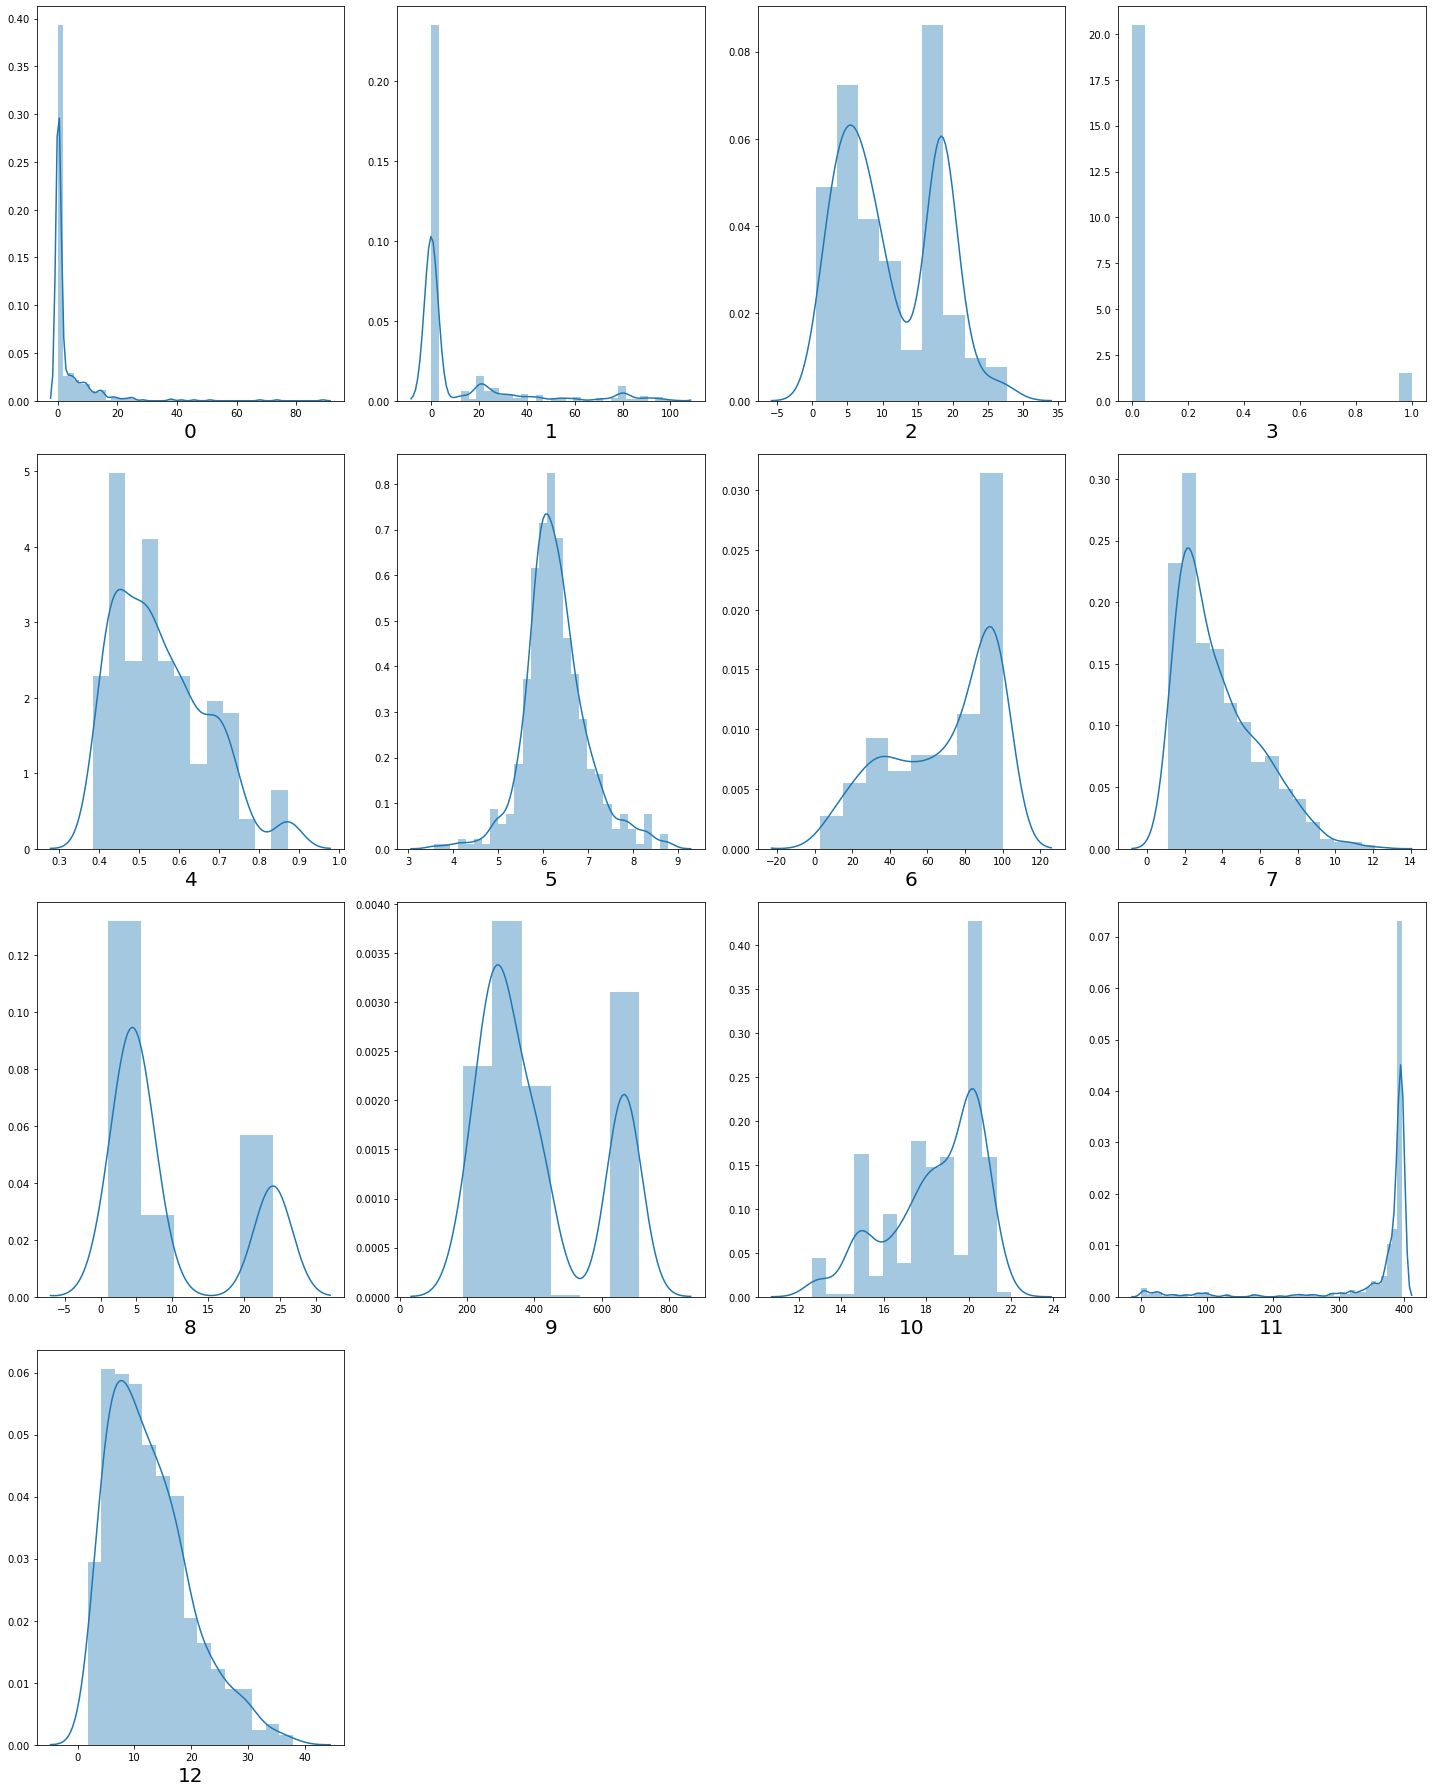

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [26]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [3]:
correlation_matrix = bos.corr().round(2)

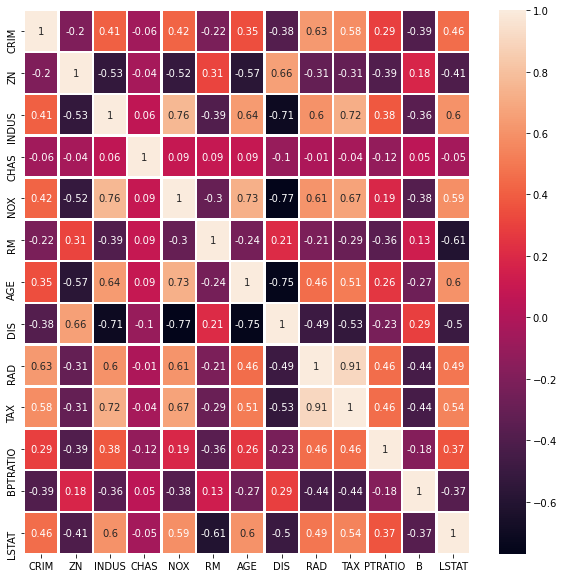

In [4]:
plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix,annot=True,linewidths=1.5)

In [14]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
bos['PRICE'] = boston.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
from sklearn.preprocessing import StandardScaler 



In [8]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(bos.drop(columns = ['PRICE']))

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]



In [10]:
x=bos.drop(columns = ['PRICE'])

In [11]:
vif["Features"] = x.columns

In [12]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [20]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
x.drop(['RAD','TAX'],axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,21.0,393.45,6.48


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [28]:
X=sc.fit_transform(x)
y=bos.PRICE

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm=LinearRegression()

In [33]:
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
lm.coef_

array([-0.88712272,  1.175452  , -0.11610477,  0.9549459 , -1.98781429,
        3.1067488 , -0.39245347, -3.18778152,  2.28873011, -1.82529057,
       -1.84545771,  0.82059585, -2.89878976])

In [35]:
lm.intercept_

22.50722857528611

In [37]:
lm.score(x_train,y_train)

0.730647531347494

In [44]:
def adj_r2(x,y,regression):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [45]:
adj_r2(x_train,y_train,lm)

0.7210541557516514

In [46]:
lm.score(x_test,y_test)

0.7519030329262335

In [47]:
adj_r2(x_test,y_test,lm)

0.7233609039708444

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
las_cv=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)

In [50]:
las_cv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [52]:
las_cv.score(x_test,y_test)

0.7517324187931373

In [53]:
las_cv.score(x_train,y_train)

0.730622088831532

In [58]:
adj_r2(x_train,y_train,las_cv)

0.721027807063888

In [59]:
adj_r2(x_test,y_test,las_cv)

0.7231706616631444

In [54]:
from sklearn.linear_model import RidgeCV

In [55]:

alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([9.08303215e+00, 8.33737818e+00, 7.33670911e+00, 4.42491802e+00,
       8.71609295e+00, 6.40258543e+00, 8.66113671e+00, 5.03145560e+00,
       3.09845333e+00, 4.19116024e+00, 9.80674094e+00, 9.57195330e+00,
       5.08536983e+00, 7.22635942e+00, 9.51419253e+00, 5.82333987e+00,
       1.28658963e+00, 1.78945211e-01, 1.14604680e-01, 8.11804089e+00,
       6.84574248e+00, 2.41047811e+0...
       3.13744468e-01, 6.97597717e+00, 6.95161639e-03, 3.03509318e+00,
       4.93265367e-01, 6.89189528e+00, 4.92818366e+00, 3.51289382e+00,
       3.46155547e+00, 6.49999532e+00, 9.39194311e+00, 2.33226045e+00,
       2.63567418e+00, 2.90665909e+00, 5.31239331e+00, 2.28755562e-01,
       2.22442521e+00, 2.97048293e+00, 7.48114048e-01, 4.79200540e+00,
       9.68102122e+00, 5.35063148e-01]),
        cv=10, normalize=True)

In [56]:
ridgecv.score(x_train,y_train)

0.7305352673203942

In [57]:
ridgecv.score(x_test,y_test)

0.7504520029814267

In [60]:
adj_r2(x_train,y_train,ridgecv)

0.7209378932797508

In [61]:
adj_r2(x_test,y_test,ridgecv)

0.72174294137752

In [62]:
from sklearn.linear_model import ElasticNetCV

In [63]:
elasticnetcv=ElasticNetCV(alphas=None,cv=10)
elasticnetcv.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [64]:
elasticnetcv.score(x_train,y_train)

0.7304324481892647

In [65]:
elasticnetcv.score(x_test,y_test)

0.7503011494807524

In [66]:
adj_r2(x_train,y_train,elasticnetcv)

0.7208314120973754

In [67]:
adj_r2(x_test,y_test,elasticnetcv)

0.7215747330493346

In [136]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [137]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]))
a

array([29.41519703])

In [212]:
lr=LinearRegression()


In [213]:
X=sc.fit_transform(X)
Y=bos.PRICE

In [214]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [215]:
lr.fit(x_train,y_train)

LinearRegression()

In [216]:
lr.score(x_train,y_train)

0.6289775425893549

In [187]:
lr.score(x_test,y_test)

0.6593780966464116

In [178]:
adj_r2(x_train,y_train,lr)

0.6657935609906769

In [188]:
adj_r2(x_test,y_test,lr)

0.6538841949794183

In [224]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(([[0.00632,18.0]]))
a

array([90.85963457])

In [223]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(lr, open(filename, 'wb'))